## Use of Fsolve and Interp1d to solve for Conversion in multiple reactor system

In [2]:
#Import Boilerplate
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob as gb
import time

from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
from scipy.interpolate import interp1d
from scipy.misc import derivative

Final Temp Reactor 1: 474.289 K
Reactor 1 Conversion: 0.29
Final Temp Reactor 2: 445.571 K
Reactor 2 Conversion: 0.533
Final Temp Reactor 3: 423.004 K
Reactor 3 Conversion: 0.738
Final Temp Reactor 4: 397.151 K
Reactor 4 Conversion: 0.9

Q needed between reactor 1&2: -87.145 kcal
Q needed between reactor 2&3: -72.785 kcal
Q needed between reactor 3&4: -61.502 kcal


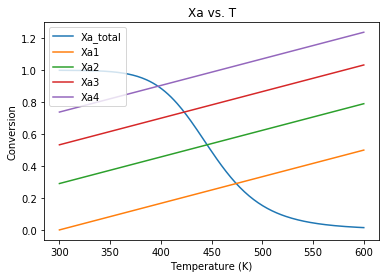

In [6]:
#Define constants
Fa0 = 10  #mol/min
Fb0 = Fa0
Ke_50 = 500000
Cp = 25  #cal/mol-K
ΔH_rxn = -30000  #cal/mol A
R = 1.9872  #cal/mol-K

#Define array of Temperatures

T = np.linspace(300,600,200)

#Create function to return Xa
def Find_Xa (Xa):
    return (1-Xa)**2*Ke_50*np.exp(-ΔH_rxn/R * (1/Ti - 1/(273+50))) - Xa**2

#initialize Xa array
Xa = np.zeros(len(T))

#itterate to solve for Xa
for i in range(len(T)):
    Ti = T[i]
    Xa[i] = fsolve(Find_Xa,0.5)
    
slope = -(Fa0*Cp + Fb0*Cp) / (Fa0*ΔH_rxn)
def Xai(Xa0,T):
    return Xa0 - slope*300 + slope * T

Xa1 = Xai(0,T)


#Find intersection 1
root1 = Xa - Xa1
interp_for_T = interp1d(root1,T)
intersect_T1 = interp_for_T(0)
Xa1_equ = Xai(0,intersect_T1)
print('Final Temp Reactor 1:', round(float(intersect_T1),3), 'K')
print('Reactor 1 Conversion:', round(Xa1_equ,3))

Xa2 = Xai(Xa1_equ,T)

#Find intersection 2
root2 = Xa - Xa2
interp_for_T2 = interp1d(root2,T)
intersect_T2 = interp_for_T2(0)
Xa2_equ = Xai(Xa1_equ,intersect_T2)
print('Final Temp Reactor 2:', round(float(intersect_T2),3), 'K')
print('Reactor 2 Conversion:', round(Xa2_equ,3))

Xa3 = Xai(Xa2_equ,T)

#Find intersection 3
root3 = Xa - Xa3
interp_for_T3 = interp1d(root3,T)
intersect_T3 = interp_for_T3(0)
Xa3_equ = Xai(Xa2_equ,intersect_T3)
print('Final Temp Reactor 3:', round(float(intersect_T3),3), 'K')
print('Reactor 3 Conversion:', round(Xa3_equ,3))


Xa4 = Xai(Xa3_equ,T)

#Find intersection 3
root4 = Xa - Xa4
interp_for_T4 = interp1d(root4,T)
intersect_T4 = interp_for_T4(0)
Xa4_equ = Xai(Xa3_equ,intersect_T4)
print('Final Temp Reactor 4:', round(float(intersect_T4),3), 'K')
print('Reactor 4 Conversion:', round(Xa4_equ,3))


#Find Q in between
def find_Q(Told):
    return(20*Cp)*(300 - Told)

Q12 = find_Q(intersect_T1) / 1000
Q23 = find_Q(intersect_T2) / 1000
Q34 = find_Q(intersect_T3) / 1000
    
plt.plot(T,Xa,label=('Xa_total'))
plt.plot(T,Xa1, label=('Xa1'))
plt.plot(T,Xa2, label=('Xa2'))
plt.plot(T,Xa3, label=('Xa3'))
plt.plot(T,Xa4, label=('Xa4'))
plt.xlabel('Temperature (K)')
plt.ylabel('Conversion')
plt.title('Xa vs. T')
plt.legend()

print()
print('Q needed between reactor 1&2:',round(float(Q12),3),'kcal')
print('Q needed between reactor 2&3:',round(float(Q23),3),'kcal')
print('Q needed between reactor 3&4:',round(float(Q34),3),'kcal')